# Lab 4: Root-finding Methods

Welcome to Lab 04! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- Learn about Lambda functions

- Implement Newton & Secant Methods

- Compare & contrast our 3 root-finding methods

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Friday, March 3, 2023 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

## 0. Lambda Functions

Sometimes we want to write a small function or we want a function that we don't need to keep because we aren't going to use it later. In python we can write functions using a shorthand technique. These small, unnamed (anonymous) functions are called lambda functions. For example, suppose we want to square a number using a lambda function (I know it seems silly but humor me). Here's how we could do this using a lambda function:

```
square_biz = lambda x : x**2
```

The `square_biz` lambda function is written in one line of code. The argument is `x` and the `:` separates the argument form the expression. Notice that unlike the functions from the previous lab we don't need the keyword `def`. If we wanted to use our lambda function we would enter

```
square_biz(5)
```

and our function will return the value 25 (lambda functions can't use a `return` statement or some other keywords).

Let's try it.

**Question 1.** Write a **lambda** function named `f` that will compute the value of $f(x)=x^6-x-1$.

In [1]:
f = lambda x: x**6 - x - 1
result = f(2) ## just to test if it works
print(result)

61


Perhaps we want to find values of the derivative for $f(x)=x^6-x-1$.

**Question 2.** Write a **lambda** function named `Df` that will compute the value of $f'(x)$, where $f(x)=x^6-x-1$..

In [25]:
Df = lambda x : 6*x**5 - 1

We can also plot lambda functions. run the cell below to load the `NumPy` and `matplotlib` modules.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

/tmp/ipykernel_181/2619784336.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Now let's plot $f(x)=x^6-x-1$.

Text(0.5, 1.0, 'Plot of x^6 - x - 1')

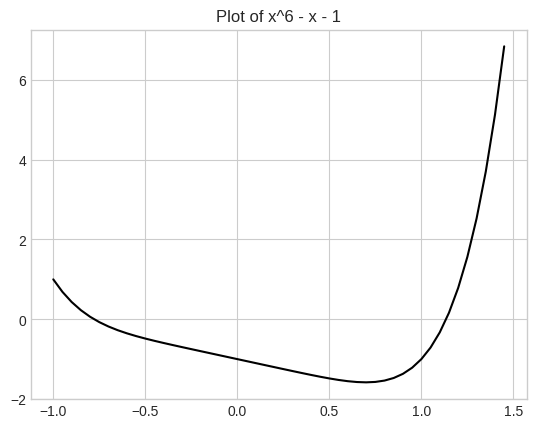

In [13]:
x = np.arange(-1,1.5,0.05)
f = lambda x: x**6-x-1
plt.plot(x, f(x), color = 'black', ms = 3);
plt.title("Plot of x^6 - x - 1")

There seems to be a root somewhere on the interval $[-1.0, -0.5]$. Let's see if we can implement our algorithms to approximate its value. 

# 1. Review of the Bisection Method

Now that we know how to use lambda functions we can update the way we wrote our `bisection_method` function. We can now pass the function in as a parameter.

In [28]:
def bisection_method(f, a, b, iterations = 25, tol = 1e-6):
    """
    Parameters
    ----------
    f               : Function for which we are searching for a solution f(x)=0
    a, b            : The endpoints of the interval
    iterations = 25 : Set the maximum number of iterations for the loop
    tol = 1e-6      : Set the level of error tolerance
    
    Returns
    -------
    The approximation for the root (if found)
    """
    
    if f(a)*f(b) >= 0:
        print("A root is not guaranteed in this interval.")
        return 0
    
    for n in range(iterations):
        c = (a + b)/2.0
                          
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
            
        if abs(b - a) < tol:
            break

    print('Number of iterations:', n)
    return c


**Question 3.** Use the `bisection_method` function to approximate the solution to $f(x)=x^6-x-1$. 

In [29]:
f = lambda x: x**6 - x - 1
root = bisection_method(f,-1.0,-0.5)
print(root)

Number of iterations: 18
-0.7780904769897461


## 2. Newton's Method

[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) is a root finding method that uses linear approximation. In particular, we make an initial guess ($x_0$) for the root of an equation ($f(x)=0$), compute the linear approximation of $f(x)$ at $x_0$ and then find the $x-$intercept of the linear approximation. The algorithm we learned in class is 

$$x_{n+1}=x_n-\frac{f\left(x_n\right)}{f'\left(x_n\right)}$$

which converges (hopefully!) to an approximate solution to the equation $f(x)=0$.

Below is a function that uses Newton's method to approximate a solution to $f(x)=0$. Read through the description and code. Ask me or a neighbor if you have questions about how it works.

In [11]:
def newtons_method(f, Df, x0, iterations = 25, tol = 1e-6):
    """
    Parameters
    ----------
    f               : Function for which we are searching for a solution f(x)=0.
    Df              : Derivative of f(x)
    x0              : Initial guess for a solution f(x)=0
    iterations = 25 : Set the aximum number of iterations for the loop
    tol = 1e-6      : Set the level of tolerance for a stopping criteria

    Returns
    -------
    The approximation of the root (if found)
    """
    xn = x0
    for n in range(0, iterations):
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        nextx = xn - f(xn)/Dfxn
        if abs(nextx-xn)<tol:
            print('Found solution after',n,'iterations.')
            return nextx
        xn = nextx
    print('Exceeded maximum iterations. No solution found.')
    return None

Now that you've read through the description of the function and the looked over the code, let's use `newtons_method`.

**Question 4.** Use the `newtons_method` function to approximate the solution to the function $x^2-x-1$.

In [30]:
p = lambda x: x**2 - x - 1
Dp = lambda x: 2*x - 1
root = newtons_method(p, Dp, 0)
print(root)

Found solution after 4 iterations.
-0.6180339887499892


### Supergolden Ratio

In mathematics, two quantities are in the supergolden ratio if the quotient of the larger number divided by the smaller one is equal to

$${\displaystyle \psi ={\frac {1+{\sqrt[{3}]{\frac {29+3{\sqrt {93}}}{2}}}+{\sqrt[{3}]{\frac {29-3{\sqrt {93}}}{2}}}}{3}}}$$

which is the only real solution to the equation $x^{3}=x^{2}+1$. [(Wikipedia)](https://en.wikipedia.org/wiki/Supergolden_ratio)

Let's test our function `newtons_method` on the polynomial $f(x)=x^3-x^2-1$ to approximate the super golden ratio.

**Question 5.** Use the `newtons_method` function to approximate the solution to the function $x^3-x^2-1$.

In [31]:
p = lambda x : x**3 - x**2 - 1
Dp = lambda x : 3*x**2 - 2*x
root = newtons_method(p, Dp, 1)
print(root)

Found solution after 5 iterations.
1.4655712318767877


Hopefully you saw Newton find a root in 5 iterations, which I hope you'll agree is pretty fast! Next we're going to explore in more detail how the error associated with Newton's Method behaves.

Since we know the real solution to $x^3-x^2-1=0$ we can make a table of values (including errors) for the first few iterations it took our algorithm to approximate the solution. 

First lets get the value of the only real solution (i.e. the supergolden ration) stored in a python variable. You may find it useful to use numpy for your calculations.

**Question 6.** Write a python expression to calculate the value of the supergolden ratio.

In [33]:
sg_ratio = (1+np.cbrt((29+3*np.sqrt(93))/2) + np.cbrt((29-3*np.sqrt(93))/2))/3
print(sg_ratio)

1.4655712318767682


Now we can use our value of alpha ($\alpha$) to make our table.

**Note:** The value for `sg_ratio` is our value of the "true" root alpha ($\alpha$).

Run the cell below so we can use the "new" Newton function that will return a list of $x-$values from Newton's method.

In [34]:
def newtons_method_values(f, Df, x0, iterations = 25, tol = 1e-6):
    """
    Parameters
    ----------
    f               : Function for which we are searching for a solution f(x)=0.
    Df              : Derivative of f(x)
    x0              : Initial guess for a solution f(x)=0
    iterations = 25 : Set the aximum number of iterations for the loop
    tol = 1e-6      : Set the level of tolerance for a stopping criteria

    Returns
    -------
    The approximation of the root (if found)
    """
    xis = [x0]
    xn = x0
    for n in range(0, iterations):
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        nextx = xn - f(xn)/Dfxn
        xis.append(nextx)
        if abs(nextx-xn)<tol:
            print('Found solution after',n,'iterations.')
            return xis
        xn = nextx
    print('Exceeded maximum iterations. No solution found.')
    return xis
    

Now let's make a table that includes the x-values as we iterate, the actual error, as well as two important ratios: One of these is the *ratio of the most-recent error to the previous error*. The other ratio we're interested in is the most-recent error to the **square** of the previous error. (Though we'll learn more in class soon why these ratios are important, go ahead and think about why you think these ratios might be important and/or what they mean.)

Run the cell below.

In [35]:
p = lambda x : x**3-x**2-1
Dp = lambda x: 3*x**2-2*x
xis = newtons_method_values(p, Dp, 1,25,1e-6)
print("{:<8} {:<25} {:<25} {:<30} {:<30}".format("n", "x_n", "alpha-x_n", "|alpha-x_{n}|/|alpha-x_{n-1}|", "|alpha-x_{n}|/|alpha-x_{n-1}|^2"))
for i in range(len(xis)):
    if i == 0:
        print("{:<8} {:<25} {:<25}".format(i, xis[i], abs(sg_ratio-xis[i])))
    else:
        print("{:<8} {:<25} {:<25} {:<30} {:<30}".format(i, xis[i],abs(sg_ratio-xis[i]), abs((sg_ratio-xis[i])/(sg_ratio-xis[i-1])), abs(sg_ratio-xis[i])/(sg_ratio-xis[i-1])**2))

Found solution after 5 iterations.
n        x_n                       alpha-x_n                 |alpha-x_{n}|/|alpha-x_{n-1}|  |alpha-x_{n}|/|alpha-x_{n-1}|^2
0        1                         0.4655712318767682       
1        2.0                       0.5344287681232318        1.1478990357047867             2.4655712318767655            
2        1.625                     0.1594287681232318        0.2983162165523054             0.5581964039845957            
3        1.4857859531772575        0.02021472130048929       0.1267946904341891             0.7953062168565592            
4        1.4659559197359893        0.00038468785922107784    0.019030084733929357           0.941397333707922             
5        1.4655713749070918        1.4303032358498058e-07    0.0003718087799146837          0.9665207024404882            
6        1.4655712318767877        1.9539925233402755e-14    1.3661386441451507e-07         0.9551391690262576            


**Question 7.** Perhaps you notice something interesting about the two error ratio columns. Write in the box below what you think might be happening in those two columns. 

One results in the error values going to zero, while the other does not result in going to zero, the other one seems to be going to one.

**Question 8.** How many iterations of the Bisection method starting with the interval of $[1,2]$ can achieve the same accuracy? Use either/ both of the cells below.

In [49]:
#you may put code for #8 in this code cell

def f(x):
    return x**3-x**2-1

def bisection_method(a, b, iterations = 50, tol = 1e-23):
    """
    Parameters
    ----------
    a, b:            The endpoints of the interval
    iterations = 25: Set the maximum number of iterations for the loop
    tol = 1e-6:      Set the level of tolerance for the distance between x_i and the midpoint
    
    Returns
    -------
    The approximation for the root
    """
    x_is = []
    print("{:<8} {:<30} {:<30} {:<30}".format('n','x_n','a','b'))
    
    if f(a)*f(b) >= 0:
        print("A root is not guaranteed in this interval.")
    
    for i in range(iterations):
        c = (a + b)/2.0
        x_is.append(c)
        print("{:<8} {:<30} {:<30} {:<30} ".format(i, c,a,b ))
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
            
        if abs(b - a) < tol:
            break
        elif i == iterations-1:
            print("\nLevel of tolerance not reached after 25 iterations.")
            break
        

    
    return c


print("\nAnswer:\t", bisection_method(1, 2))

n        x_n                            a                              b                             
0        1.5                            1                              2                              
1        1.25                           1                              1.5                            
2        1.375                          1.25                           1.5                            
3        1.4375                         1.375                          1.5                            
4        1.46875                        1.4375                         1.5                            
5        1.453125                       1.4375                         1.46875                        
6        1.4609375                      1.453125                       1.46875                        
7        1.46484375                     1.4609375                      1.46875                        
8        1.466796875                    1.46484375                     1.4

Newtons method resulted in 1.4655712318767877 in 5 iterations, while getting the same number (equal error) using the bisection method took roughly 49 iterations. 

## 3. Secant Method

The Secant method is similar to Newton's method, except we use secant lines instead of tangent lines. Remember the formula we derived in class for secant method:

$$x_{n+1}=x_n-f(x_n) \cdot \frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}$$

Your next task will be to write a python function to implement the Secant method.

**Question 9.** Fill in the ellipses for the `secant_method` function. I suggest you use the Newton Method code above as a model. Then test your function on the polynomial $f(x)=x^3-x^2-1$.

In [ ]:
def secant_method(f, x0, x1, iterations=25, tol=1e-6):
    for n in range(iterations):
        if f(x1) - f(x0) == 0:
            print('Slope is 0, no solution found')
            return None

        x_next = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        if abs(x_next - x1) < tol:
            print('Found solution after', n, 'iterations.')
            return x_next
        x0, x1 = x1, x_next

f = lambda x: x**3 - x**2 - 1
root = secant_method(f, 1, 2, iterations=7)
print(root)

# 4. Comparing Methods

**Question 10.** Consider the function $$f_1(x)=x^4-7.5x^3+10.56x^2+31.744x-68.8128$$ which has a root at $x=3.2$.

**a.** Use all three root finding methods to find the root at $x=3.2$. Use the following specifications:

- Tolerance for each method: $10^{-7}$
- Maximum number of iterations for each method: 25
- Initial interval/points for the Bisection and Secant methods: $[3.0, 3.5]$
- Initial point for Newton's method: 3.0

**b.** Now consider $$f_2(x)=x^2-1.1x-6.72$$ which also has a root at $x=3.2$. Using the same specifications as above, find the root at $x=3.2$ using all three root finding methods.

Use the code cell below for your comparisons.

In [70]:
# part a
f = lambda x : x**4 - 7.5*x**3 +10.56*x**2 + 31.744*x - 68.8128
Df = lambda x : 4*x**3 - 22.5*x**2 + 21.12*x + 31.744
#print(bisection_method(f, 3.0, 3.5, 25, 1e-7)) <-- bisection number of parameters is not working for some reason
print(newtons_method(f, Df, 3.0, 25, 1e-7))
print(secant_method(f, 3.0, 3.5, 25, 1e-7))

Exceeded maximum iterations. No solution found.
None
None


In [72]:
#part b
f = lambda x : x**2 - 1.1*x - 6.72
Df = lambda x : 2*x - 1.1
#print(bisection_method(f, 3.0, 3.5, 25, 1e-7)) <-- bisection number of parameters is not working for some reason
print(newtons_method(f, Df, 3.0, 25, 1e-7))
print(secant_method(f, 3.0, 3.5, 25, 1e-7))

Found solution after 3 iterations.
3.1999999999999997
Found solution after 4 iterations.
3.1999999999999997


**Question 11.** Compare and contrast our various root-finding methods. What did you learn about their strengths and weaknesses? Which seem to work "best"? Support your statements with evidence. Be clear and concise in your comparisons.

The newton and secant method seem to work the best because they are able to approximate the root with a minimum number of iterations. For example, when we ran the ones earlier, they seemed to be able to run the code 

## 4. Submitting your work
You're done with Lab 04! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab03` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 04 assignment to Gradescope for Grading.